In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('../input/tabular-playground-series-jan-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jan-2021/test.csv')
sub = pd.read_csv('../input/tabular-playground-series-jan-2021/sample_submission.csv')

train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


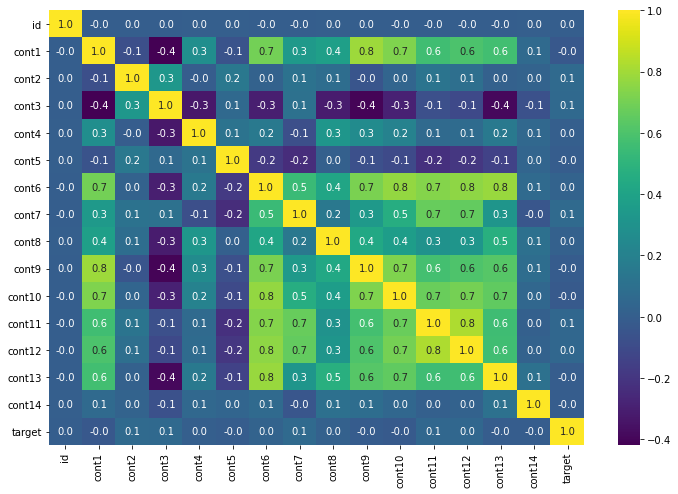

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt='.1f', cmap='viridis')
plt.show()

In [4]:
train.shape, test.shape

((300000, 16), (200000, 15))

In [4]:
feature_cols = list(train.columns.values[1:-1])

In [5]:
feature_cols

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [6]:
X = train[feature_cols]
y = train['target']
tes = test[feature_cols]

print(X.shape, tes.shape)

(300000, 14) (200000, 14)


In [7]:
# modelling

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=201)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240000, 14)
(60000, 14)
(240000,)
(60000,)


Performing KMeans Clustering

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [10]:
import matplotlib.pyplot as plt

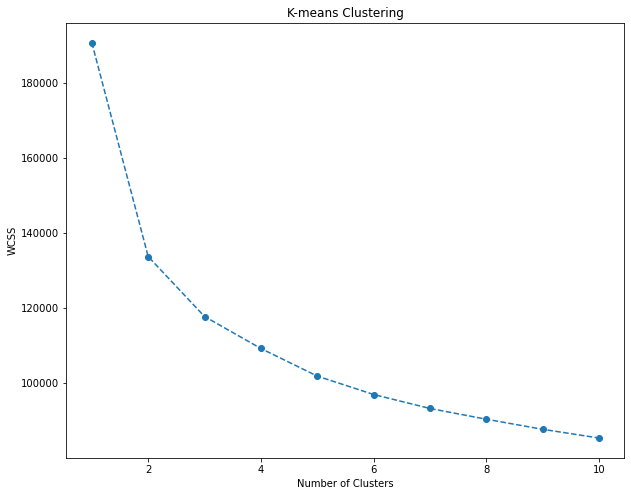

In [11]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [13]:
X_kmeans_analysis = X.copy()
X_kmeans_analysis['cluster_k_means'] = kmeans.labels_

X_kmeans_analysis.groupby('cluster_k_means').mean()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cluster_k_means,,,,,,,,,,,,,,
0,0.365013,0.520629,0.578239,0.494037,0.556881,0.346157,0.360209,0.444551,0.316493,0.365370,0.298154,0.314628,0.398346,0.501641
1,0.569533,0.334998,0.323278,0.614811,0.502025,0.541880,0.452324,0.573467,0.521050,0.556238,0.437485,0.481154,0.606426,0.501698
2,0.798278,0.515330,0.357337,0.668143,0.444335,0.854824,0.602952,0.760838,0.746179,0.805334,0.753723,0.774436,0.877525,0.552672
3,0.487074,0.561819,0.689356,0.367053,0.450795,0.579160,0.647032,0.451878,0.447549,0.547976,0.634307,0.655337,0.538737,0.471734


In [14]:
X_kmeans_analysis['n_obs'] = X_kmeans_analysis[['cluster_k_means','cont5']].groupby(['cluster_k_means']).count()
X_kmeans_analysis['prop_obs'] = X_kmeans_analysis['n_obs'] / X_kmeans_analysis['n_obs'].sum()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


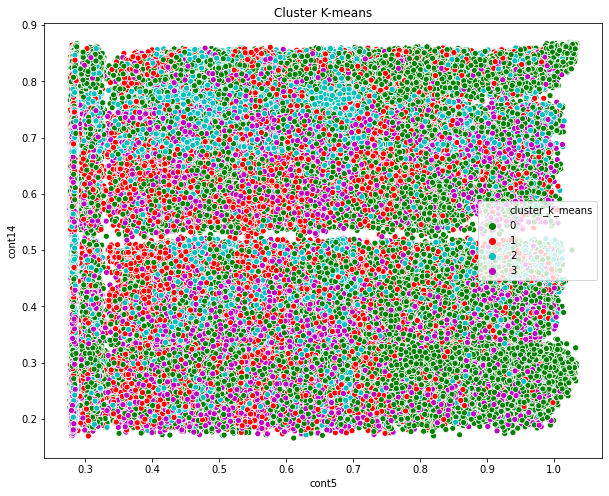

In [15]:
import seaborn as sns
x_axis = X_kmeans_analysis['cont5']
y_axis = X_kmeans_analysis['cont14']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = X_kmeans_analysis['cluster_k_means'], palette = ['g', 'r', 'c', 'm'])
plt.title('Cluster K-means')
plt.show();

Not Very Separated Yeah?

So i introduced decomposition with PCA

Adding PCA...

In [16]:
# fitting on all the datapoints
pca = PCA()
pca.fit(X)

PCA()

In [17]:
pca.explained_variance_ratio_

array([0.41192422, 0.13180328, 0.10148   , 0.06822218, 0.06203111,
       0.05405392, 0.04179958, 0.03151377, 0.02627762, 0.0183476 ,
       0.01602247, 0.01310048, 0.01256245, 0.01086133])

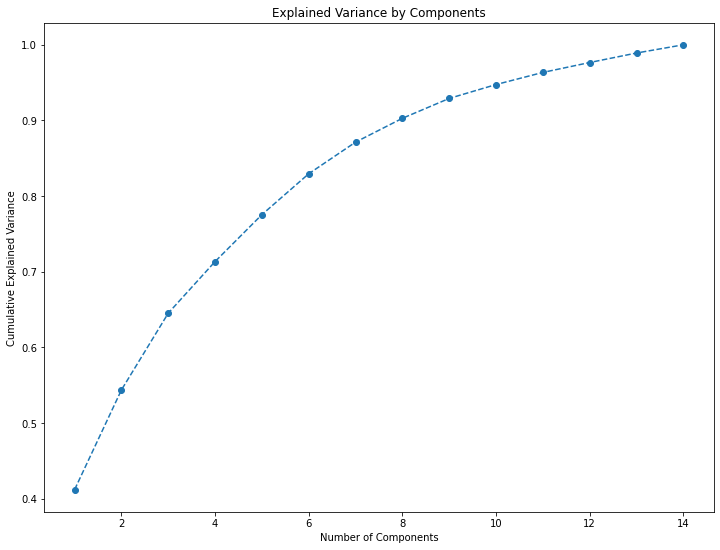

In [18]:
plt.figure(figsize = (12,9))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show();

In [19]:
pca = PCA(n_components=7)
pca.fit(X)
pca.components_

array([[ 0.32449544,  0.01097826, -0.15055166,  0.11935123, -0.08383994,
         0.39028873,  0.20505387,  0.22585561,  0.31989016,  0.34042805,
         0.3530335 ,  0.35919024,  0.36358683,  0.03453634],
       [ 0.13456203, -0.30005895, -0.45619099,  0.52831277,  0.22731244,
        -0.05927445, -0.33163967,  0.25627984,  0.1231799 , -0.01353087,
        -0.2796513 , -0.24412075,  0.0759439 ,  0.12190492],
       [-0.03787116,  0.71923786,  0.24261222,  0.2746104 ,  0.52745997,
        -0.0261203 , -0.01546337,  0.22470342, -0.01255388,  0.01844213,
         0.02225096,  0.01603176, -0.01444276,  0.12611765],
       [ 0.0510062 , -0.00869501,  0.01854058,  0.3302921 ,  0.071645  ,
        -0.03645637,  0.0699161 , -0.06507818,  0.01019664,  0.04168668,
         0.06312291,  0.05375723, -0.16488472, -0.91454775],
       [ 0.20580166, -0.27122184, -0.01061132, -0.39799784,  0.74918111,
         0.06257306, -0.0383925 , -0.33580134,  0.14985059,  0.14123126,
        -0.00969207,  0.04

In [20]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = X.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6',
                                   'Component 7'])
df_pca_comp

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
Component 1,0.324495,0.010978,-0.150552,0.119351,-0.083840,0.390289,0.205054,0.225856,0.319890,0.340428,0.353034,0.359190,0.363587,0.034536
Component 2,0.134562,-0.300059,-0.456191,0.528313,0.227312,-0.059274,-0.331640,0.256280,0.123180,-0.013531,-0.279651,-0.244121,0.075944,0.121905
Component 3,-0.037871,0.719238,0.242612,0.274610,0.527460,-0.026120,-0.015463,0.224703,-0.012554,0.018442,0.022251,0.016032,-0.014443,0.126118
Component 4,0.051006,-0.008695,0.018541,0.330292,0.071645,-0.036456,0.069916,-0.065078,0.010197,0.041687,0.063123,0.053757,-0.164885,-0.914548
Component 5,0.205802,-0.271222,-0.010611,-0.397998,0.749181,0.062573,-0.038393,-0.335801,0.149851,0.141231,-0.009692,0.043351,-0.006949,-0.041500
Component 6,0.112604,-0.182596,0.183091,0.534319,-0.013741,-0.067808,0.202048,-0.471086,0.015250,0.068953,0.184592,0.177283,-0.412444,0.356128
Component 7,-0.190651,-0.473331,0.264666,-0.014249,0.230822,-0.064736,0.286690,0.629945,-0.154679,-0.150715,0.145828,0.179836,-0.177023,0.035798


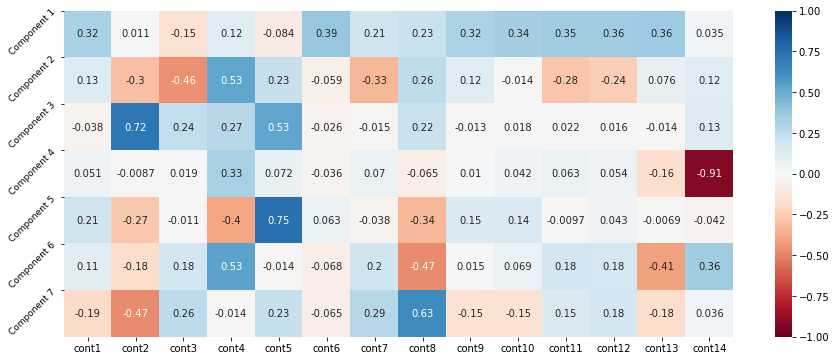

In [21]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3, 4, 5, 6], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'],
           rotation = 45,
           fontsize = 9)
plt.show();

In [22]:
# apply pca on the data
scores_pca = pca.transform(X)

In [23]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [24]:
# applying clustering on the pcaed data. my friend's word and i like it
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [25]:
df_segm_pca_kmeans = pd.concat([X.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6',
                                          'Component 7']

# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [26]:
df_segm_pca_kmeans.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cont13,cont14,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Segment K-means PCA
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,...,0.878733,0.305411,0.701568,-0.711393,-0.006835,0.136575,0.027457,-0.001902,-0.241358,0
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,...,0.369957,0.369484,-0.244214,-0.096637,0.200448,0.144336,0.013551,-0.031513,0.115362,2
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,...,0.882938,0.303047,0.578250,0.063929,-0.288206,0.094698,0.391696,-0.245734,-0.046645,3
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,...,0.914281,0.279528,0.753708,0.024004,-0.273023,0.246853,-0.143207,-0.002198,0.298953,3
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,...,0.935918,0.435772,1.040833,0.243677,0.076480,0.204630,0.204213,0.166971,-0.082908,3


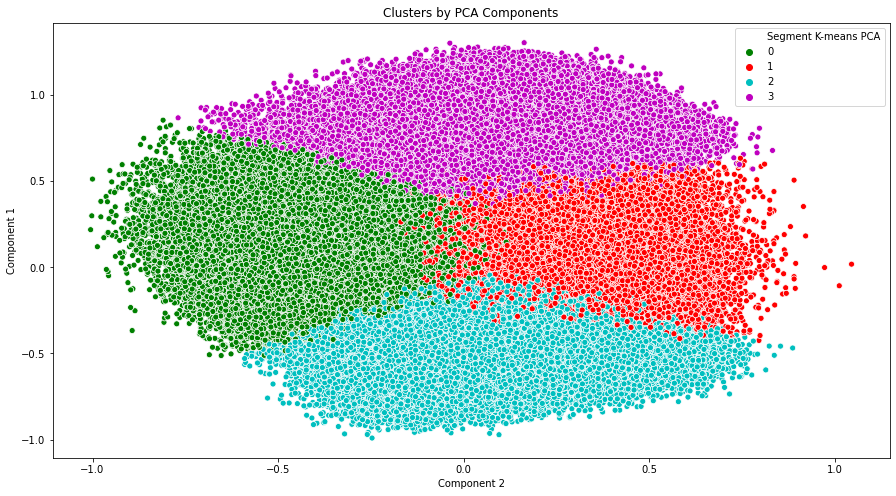

In [27]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (15, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


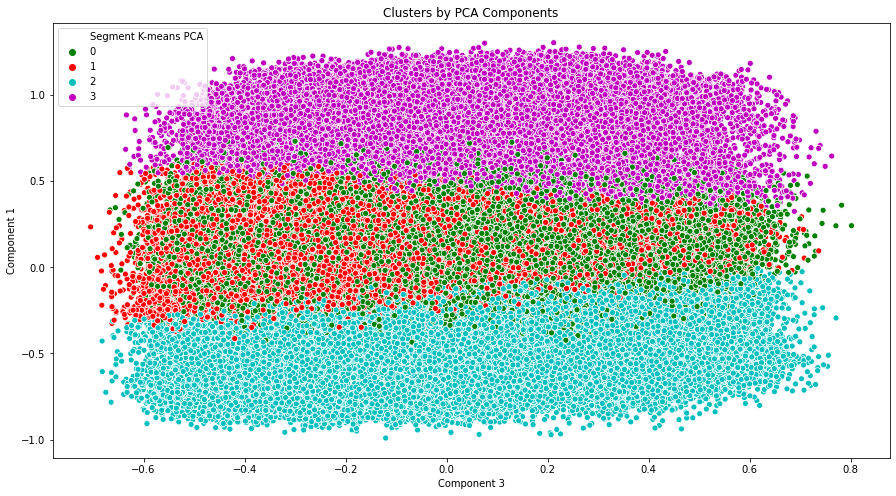

In [48]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (15, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show();

In [28]:
X_components = df_segm_pca_kmeans.columns.values
X_components

array(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 5', 'Component 6', 'Component 7', 'Segment K-means PCA'],
      dtype=object)

In [29]:
train_df = df_segm_pca_kmeans[X_components]
train_df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cont13,cont14,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Segment K-means PCA
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,...,0.878733,0.305411,0.701568,-0.711393,-0.006835,0.136575,0.027457,-0.001902,-0.241358,0
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,...,0.369957,0.369484,-0.244214,-0.096637,0.200448,0.144336,0.013551,-0.031513,0.115362,2
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,...,0.882938,0.303047,0.578250,0.063929,-0.288206,0.094698,0.391696,-0.245734,-0.046645,3
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,...,0.914281,0.279528,0.753708,0.024004,-0.273023,0.246853,-0.143207,-0.002198,0.298953,3
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,...,0.935918,0.435772,1.040833,0.243677,0.076480,0.204630,0.204213,0.166971,-0.082908,3


Applying both pca and clustering to the test data

In [30]:
test_components = pca.transform(tes)

In [31]:
test_components_transform = kmeans_pca.transform(test_components)

In [32]:
test_segm_pca_kmeans = pd.concat([tes.reset_index(drop = True), pd.DataFrame(test_components)], axis = 1)
test_segm_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6',
                                          'Component 7']
# The last column we add contains the pca k-means clustering labels.
test_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.predict(test_components)

In [33]:
test_df = test_segm_pca_kmeans[train_df.columns]
test_df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cont13,cont14,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Segment K-means PCA
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,...,0.286864,0.364515,-0.157213,-0.474895,-0.009794,0.102454,-0.156383,0.016969,-0.019571,0
1,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,...,0.916964,0.513002,0.512032,0.549457,-0.323996,0.054500,-0.032462,0.079869,-0.267107,1
2,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,...,0.327164,0.827941,-0.602840,0.113511,-0.107904,-0.377174,-0.355023,-0.071068,0.291630,2
3,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,...,0.299028,0.598166,-0.308221,-0.204617,-0.439634,-0.163079,0.025651,0.087997,0.128912,2
4,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,...,0.790591,0.249275,0.236230,-0.670544,-0.088234,0.136664,-0.065966,-0.123411,-0.044126,0


In [34]:
# modelling

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240000, 22)
(60000, 22)
(240000,)
(60000,)


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(n_estimators=600, learning_rate=0.1, max_depth=5, verbose=1)


In [40]:
grb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.5341           46.85m
         2           0.5313           47.51m
         3           0.5289           47.89m
         4           0.5270           48.05m
         5           0.5251           47.79m
         6           0.5234           47.53m
         7           0.5220           47.59m
         8           0.5206           47.63m
         9           0.5193           47.71m
        10           0.5182           47.53m
        20           0.5100           46.57m
        30           0.5044           45.85m
        40           0.5002           44.89m
        50           0.4975           44.22m
        60           0.4946           43.45m


KeyboardInterrupt: 

In [36]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(iterations=7000,
                            learning_rate = 0.03,
                            depth=7,
                            eval_metric='RMSE',
                            random_seed=42,
                            bagging_temperature=0.4,
                            od_type='Iter',
                            metric_period=50,
                            od_wait=20);

cb_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=300);

0:	learn: 0.7325951	test: 0.7316303	best: 0.7316303 (0)	total: 117ms	remaining: 13m 42s
300:	learn: 0.7061935	test: 0.7075930	best: 0.7075930 (300)	total: 13.1s	remaining: 4m 52s
600:	learn: 0.6989827	test: 0.7033890	best: 0.7033890 (600)	total: 25.1s	remaining: 4m 27s
900:	learn: 0.6933529	test: 0.7012921	best: 0.7012921 (900)	total: 37.1s	remaining: 4m 11s
1200:	learn: 0.6886453	test: 0.7000424	best: 0.7000424 (1200)	total: 49.2s	remaining: 3m 57s
1500:	learn: 0.6844024	test: 0.6991550	best: 0.6991550 (1500)	total: 1m 1s	remaining: 3m 44s
1800:	learn: 0.6804492	test: 0.6985321	best: 0.6985312 (1796)	total: 1m 14s	remaining: 3m 33s
2100:	learn: 0.6767891	test: 0.6980868	best: 0.6980868 (2100)	total: 1m 26s	remaining: 3m 20s
2400:	learn: 0.6733068	test: 0.6977972	best: 0.6977901 (2397)	total: 1m 38s	remaining: 3m 8s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6975963968
bestIteration = 2578

Shrink model to first 2579 iterations.


In [37]:
feature_importance = pd.Series(cb_model.feature_importances_, index=train_df.columns)
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

cont13                 9.544841
cont4                  7.345023
cont3                  7.285200
cont1                  6.420049
cont2                  6.349095
cont10                 6.192303
cont12                 6.058390
cont11                 5.616586
cont7                  5.560244
cont9                  5.515725
cont6                  5.501458
cont14                 5.041058
cont5                  4.995168
cont8                  4.235163
Component 1            2.676410
Component 2            2.471988
Component 7            2.052261
Component 6            1.665193
Component 3            1.646816
Component 5            1.470541
Component 4            1.400732
Segment K-means PCA    0.955756
dtype: float64

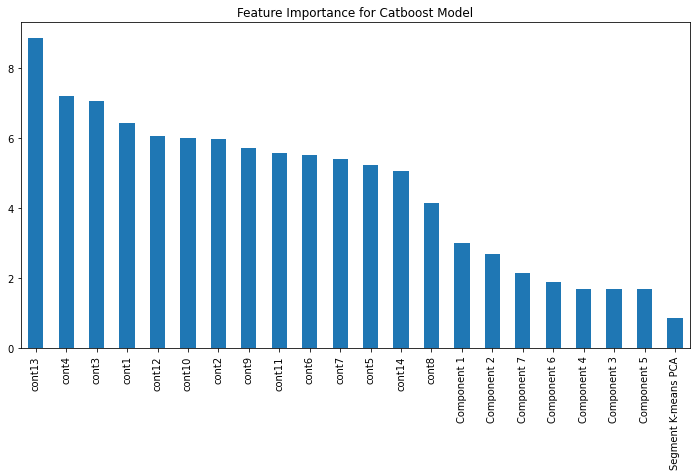

In [53]:
feature_importance.plot(kind='bar', figsize=(12, 6), title='Feature Importance for Catboost Model')
plt.show();

In [45]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    import lightgbm as lgb
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': 50,
        'learning_rate': 0.04,
        'bagging_fraction': 0.6,
        'feature_fraction': 0.3,
        'bagging_frequency': 3,
        'bagging_seed': 42, 
        'verbosity': -1,
        'seed': 42
    }
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, valid_sets=[lgtrain, lgval],
                     early_stopping_rounds=200, verbose_eval=300,
                     evals_result=evals_result)
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    
    return pred_test_y, model, evals_result

In [46]:
# Training LGB
pred_test, model, evals_result = run_lgb(X_train, y_train, X_test, y_test, test_df)
print('\nLightGBM Training Completed...')

Training until validation scores don't improve for 200 rounds
[300]	training's rmse: 0.687398	valid_1's rmse: 0.700181
[600]	training's rmse: 0.674794	valid_1's rmse: 0.699002
[900]	training's rmse: 0.664114	valid_1's rmse: 0.698546
[1200]	training's rmse: 0.654028	valid_1's rmse: 0.698274
[1500]	training's rmse: 0.644401	valid_1's rmse: 0.698171
Early stopping, best iteration is:
[1420]	training's rmse: 0.646886	valid_1's rmse: 0.698132

LightGBM Training Completed...


In [49]:
def run_xgb(train_X, train_y, val_X, val_y, test_X):
    import xgboost as xgb
    params = {'objective': 'reg:squarederror',
             'eval_metric': 'rmse',
              'learning_rate': 0.02,
             'eta': 0.01,
             'max_depth': 7,
             'subsample': 0.6,
             'colsample_bytree':0.6,
             'alpha':0.001,
             'random_state':42,
             'silent':True}
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    model_xgb = xgb.train(params, tr_data, 7000, watchlist, maximize=False, early_stopping_rounds=200,
                         verbose_eval=300)
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit)
    
    return xgb_pred_y, model_xgb

In [50]:
# Training XGB
pred_test_xgb, model_xgb = run_xgb(X_train, y_train, X_test, y_test, test_df)
print('XGB Training Completed')

[13:54:56] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:7.29326	valid-rmse:7.29921
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[300]	train-rmse:0.69178	valid-rmse:0.70445
[600]	train-rmse:0.67735	valid-rmse:0.70060
[900]	train-rmse:0.66739	valid-rmse:0.69953
[1200]	train-rmse:0.65901	valid-rmse:0.69892
[1500]	train-rmse:0.65109	valid-rmse:0.69871
[1800]	train-rmse:0.64361	valid-rmse:0.69861
[2100]	train-rmse:0.63652	valid-rmse:0.69861
Stopping. Best iteration:
[1958]	train-rmse:0.63984	valid-rmse:0.69859

XGB Training Completed


In [55]:
sub_lgb = pd.DataFrame()
sub_lgb['target'] = pred_test

sub_xgb = pd.DataFrame()
sub_xgb['target'] = pred_test_xgb

sub_cat = pd.DataFrame()
sub_cat['target'] = cb_model.predict(test_df)

# Stacking 3 Models
sub['target'] = (sub_lgb['target']*0.3 \
                               + sub_xgb['target']*0.1 \
                              + sub_cat['target']*0.6)

sub.to_csv('submission_stacked.csv', index=False)

In [56]:
sub.head()

,id,target
0,0,7.948935
1,2,7.890275
2,6,7.946950
3,7,8.235512
4,10,8.156667


In [42]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
y_pred_tot_cb = []
for train, test in kfold.split(X):
    x_train, x_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    model = CatBoostRegressor(random_state=27,  n_estimators=5000,
                              verbose=500, learning_rate=0.005, eval_metric='RMSE')
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = np.sqrt(mean_squared_error(y_test, preds))
    scores.append(score)
    print(score)
    test_pred = model.predict(test_df)
    y_pred_tot_cb.append(test_pred)
print("Average: ", sum(scores)/len(scores))

0:	learn: 0.7332697	total: 31.2ms	remaining: 2m 36s
500:	learn: 0.7170997	total: 15.7s	remaining: 2m 21s
1000:	learn: 0.7124711	total: 30.7s	remaining: 2m 2s
1500:	learn: 0.7096172	total: 46s	remaining: 1m 47s
2000:	learn: 0.7074787	total: 1m 1s	remaining: 1m 31s
2500:	learn: 0.7056689	total: 1m 16s	remaining: 1m 16s
3000:	learn: 0.7039481	total: 1m 31s	remaining: 1m 1s
3500:	learn: 0.7023918	total: 1m 46s	remaining: 45.8s
4000:	learn: 0.7009840	total: 2m 2s	remaining: 30.6s
4500:	learn: 0.6997223	total: 2m 17s	remaining: 15.3s
4999:	learn: 0.6985485	total: 2m 32s	remaining: 0us
0.7023673065700776
0:	learn: 0.7327711	total: 31.6ms	remaining: 2m 37s
500:	learn: 0.7166911	total: 16.1s	remaining: 2m 24s
1000:	learn: 0.7120920	total: 31.8s	remaining: 2m 6s
1500:	learn: 0.7092523	total: 47.2s	remaining: 1m 50s
2000:	learn: 0.7071696	total: 1m 2s	remaining: 1m 33s
2500:	learn: 0.7053539	total: 1m 18s	remaining: 1m 18s
3000:	learn: 0.7036531	total: 1m 33s	remaining: 1m 2s
3500:	learn: 0.70210

In [41]:
from xgboost import XGBRegressor
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=221), list()
y_pred_tot_cb = []
for train, test in kfold.split(X):
    x_train, x_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    model = XGBRegressor(learning_rate=0.1, objective='reg:squarederror')
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = mean_squared_error(y_test, preds, squared=True)
    scores.append(score)
    print(score)
    test_pred = model.predict(test_df)
    y_pred_tot_cb.append(test_pred)
print("Average: ", sum(scores)/len(scores))

0.49348021457807584


ValueError: feature_names mismatch: ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'] ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Segment K-means PCA']
training data did not have the following fields: Component 5, Component 7, Component 3, Component 4, Component 1, Segment K-means PCA, Component 6, Component 2

In [ ]:
y_pred_tot_cb

In [1]:
from sklearn.metrics import mean_squared_error
pred = model_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("RMSE:: ",rmse)

NameError: name 'model_xgb' is not defined

In [57]:
# submission file
sub['target'] = cb_model.predict(test_df)

sub.to_csv('catBoost_model9.csv', index=False)

In [58]:
sub.head(10)

,id,target
0,0,7.939616
1,2,7.887894
2,6,7.944348
3,7,8.245624
4,10,8.151168
5,14,8.049667
6,16,8.253845
7,17,7.700370
8,18,8.007491
9,19,7.701486
